# Make All Figures for Main Manuscript

Kendra Wyant  
December 4, 2024

In [ ]:
#| message: false
#| warning: false

suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(source("https://github.com/jjcurtin/lab_support/blob/main/format_path.R?raw=true"))
suppressPackageStartupMessages(library(tidyposterior))
library(kableExtra, exclude = "group_rows")
library(patchwork)

theme_set(theme_classic())

path_models_lag <- format_path(str_c("studydata/risk/models/lag"))
path_shared <- format_path("studydata/risk/data_processed/shared")
path_processed <- format_path("studydata/risk/data_processed/lag")

Data for figures

In [ ]:
test_metrics_all_pp_perf <- read_csv(here::here(path_models_lag,
                                                "test_metrics_all_pp_perf.csv"),
                                     show_col_types = FALSE)

pp_dem <- read_csv(here::here(path_models_lag, "pp_dem_all.csv"),
                            show_col_types = FALSE)

## Figure 1: Prediction Methods

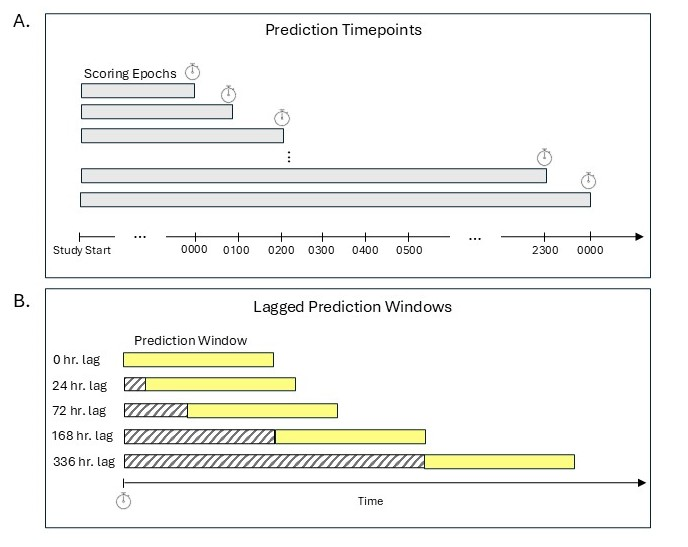

In [ ]:
#| label: fig-methods
#| fig-cap: "Panel A shows the prediction time points at which our model calculated a predicted probability of a lapse. All available data up until, but not including, the prediction time point was used to generate these predictions. Features were created for varying scoring epochs before the prediction time point (i.e., 12, 24, 48, 72, and 168 hours). Prediction time points were updated hourly. Panel B shows how the prediction window (i.e., window of time in which a lapse might occur) rolls forward hour-by-hour with the prediction time point with the prediction time point. The prediction window width for all our models was one week (i.e., models predicted the probability of a lapse occurring within a one week window). Additionally, there were five possible lag times between the prediction time point and start of the prediction window. A prediction window either started immediately after the prediction time point (0 lag) or was lagged by 24, 72, 168, or 336 hours."

knitr::include_graphics(path = here::here("figures/methods.png"), error = FALSE)

## Figure 2: Posterior probability for auROC by model and demographic group differences

In [ ]:
fig_2a <- test_metrics_all_pp_perf |>
  mutate(model_numeric = case_when(model == "336 lag" ~ as.numeric(336),
                                   model == "168 lag" ~ as.numeric(168),
                                   model == "72 lag" ~ as.numeric(72),
                                   model == "24 lag" ~ as.numeric(24),
                                   model == "0 lag" ~ as.numeric(0))) |> 
  ggplot() + 
  geom_point(aes(x = model_numeric, y = pp_median), color = "black") +
  geom_line(aes(x = model_numeric, y = pp_median)) +
  geom_segment(mapping = aes(x = model_numeric, y = pp_lower, yend = pp_upper)) +
  scale_y_continuous("Area Under ROC Curve", limits = c(.50, 1.0)) +
  scale_x_continuous("Model Lag (Hours)", breaks = c(0, 24, 72, 168, 336), 
                     labels = c("0", "24", "72", "168", "336")) +
  theme_classic() +
  theme(legend.position = "none",
        panel.border = element_rect(colour = "black", fill = NA, linewidth = 1)) +
  geom_hline(yintercept = 0.5, linetype = "dashed", color = "black")

In [ ]:
pp_dem <- pp_dem |>
  mutate(contrast = factor(model, levels = c("not white", 
                                             "non-hispanic white",
                                             "female",
                                             "male",
                                             "below poverty",
                                             "above poverty"),
                           labels = c("Not White vs. Non-Hispanic White",
                                      "Not White vs. Non-Hispanic White",
                                      "Female vs. Male",
                                      "Female vs. Male",
                                      "Below Poverty vs. Above Poverty",
                                      "Below Poverty vs. Above Poverty")),
         group = factor(model, levels = c("non-hispanic white",
                                          "not white", 
                                          "female",
                                          "male",
                                          "below poverty",
                                          "above poverty"),
                        labels = c("advantaged group", 
                                   "disadvantaged group",
                                   "disadvantaged group",
                                   "advantaged group",
                                   "disadvantaged group",
                                   "advantaged group"))) 

pp_dem_a <- pp_dem |> 
  filter(contrast == "Not White vs. Non-Hispanic White") |> 
  ggplot() + 
  geom_point(aes(x = lag, y = pp_median, color = group)) +
  geom_line(aes(x = lag, y = pp_median, color = group)) +
  geom_segment(mapping = aes(x = lag, y = pp_lower, yend = pp_upper, color = group)) +
  facet_wrap(~ contrast) +
  scale_y_continuous("Area Under ROC Curve", limits = c(.50, 1.0)) +
  scale_x_continuous(NULL, breaks = c(0, 24, 72, 168, 336), 
                     labels = c("0", "24", "72", "168", "336")) +
  theme_classic() +
  theme(panel.border = element_rect(colour = "black", fill = NA, linewidth = 1)) +
  scale_color_manual(values = c("#240e31", "#cb6bce")) +
  geom_hline(yintercept = 0.5, linetype = "dashed", color = "black") +
  labs(color = NULL)

pp_dem_b <- pp_dem |> 
  filter(contrast == "Female vs. Male") |> 
  ggplot() + 
  geom_point(aes(x = lag, y = pp_median, color = group)) +
  geom_line(aes(x = lag, y = pp_median, color = group)) +
  geom_segment(mapping = aes(x = lag, y = pp_lower, yend = pp_upper, color = group)) +
  facet_wrap(~ contrast) +
  scale_y_continuous(NULL, limits = c(.50, 1.0)) +
  scale_x_continuous("Model Lag (Hours)", breaks = c(0, 24, 72, 168, 336), 
                     labels = c("0", "24", "72", "168", "336")) +
  theme_classic() +
  theme(panel.border = element_rect(colour = "black", fill = NA, linewidth = 1)) +
  scale_color_manual(values = c("#240e31", "#cb6bce")) +
  geom_hline(yintercept = 0.5, linetype = "dashed", color = "black") +
  labs(color = NULL)

pp_dem_c <- pp_dem |> 
  filter(contrast == "Below Poverty vs. Above Poverty") |> 
  ggplot() + 
  geom_point(aes(x = lag, y = pp_median, color = group)) +
  geom_line(aes(x = lag, y = pp_median, color = group)) +
  geom_segment(mapping = aes(x = lag, y = pp_lower, yend = pp_upper, color = group)) +
  facet_wrap(~ contrast) +
  scale_y_continuous(NULL, limits = c(.50, 1.0)) +
  scale_x_continuous(NULL, breaks = c(0, 24, 72, 168, 336), 
                     labels = c("0", "24", "72", "168", "336")) +
  theme_classic() +
  theme(panel.border = element_rect(colour = "black", fill = NA, linewidth = 1)) +
  scale_color_manual(values = c("#240e31", "#cb6bce")) +
  geom_hline(yintercept = 0.5, linetype = "dashed", color = "black") +
  labs(color = NULL)

fig_2b <- pp_dem_a + pp_dem_b + pp_dem_c + plot_layout(guides = "collect") &
  theme(legend.position = "bottom") 

fig_2 <- (fig_2a / fig_2b) &
  plot_annotation(tag_levels = "A")

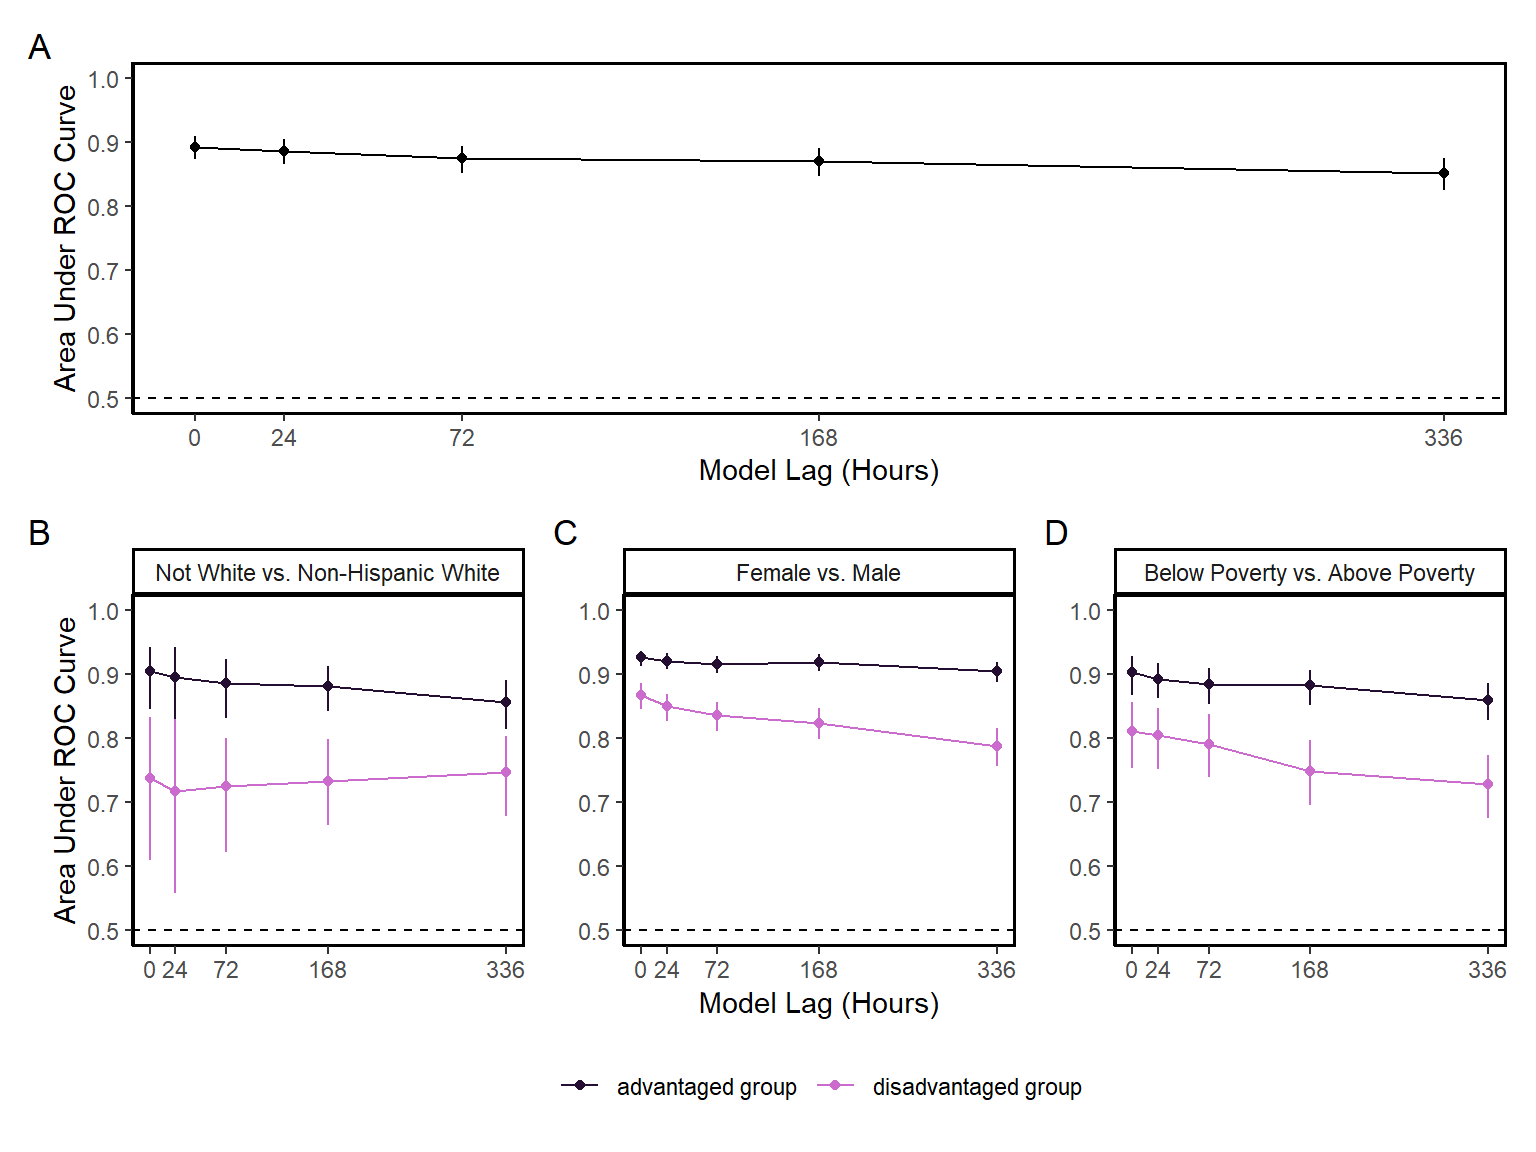

In [ ]:
#| label: fig-2
#| fig-cap: "Panel A in displays the median posterior probability for area under ROC curve (auROC) and 95% Bayesian CI for each lagged model (0, 24, 72, 168, 336 hours). Dashed line represents a random classifier with an auROC of .5. Panels B-D display the median auROC and Bayesian credible interval by model and fairness contrast. The darker lines represent the advantaged groups (White, male, above poverty) and the lighter lines represent the disadvantaged groups (not-White, female, below poverty). Dashed line represents a random classifier with an auROC of .5."
#| fig-width: 8
#| fig-height: 6

fig_2 